In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive')

# Define base data directory in Google Drive
data_dir = '/content/drive/MyDrive/Colab Notebooks/chest_xray'

# Define subdirectories for train, validation, and test
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'val')
test_dir = os.path.join(data_dir, 'test')

Mounted at /content/drive


In [ ]:
# Helper function to load file paths and labels
def load_paths_labels(directory, set_name):
    filepaths = []
    labels = []
    class_folders = os.listdir(directory)

    for folder in class_folders:
        folder_path = os.path.join(directory, folder)
        if os.path.isdir(folder_path):  # Ensures we're looking at folders, not files
            file_list = os.listdir(folder_path)
            for file in file_list:
                file_path = os.path.join(folder_path, file)
                filepaths.append(file_path)
                labels.append(folder)  # Use folder name (NORMAL or PNEUMONIA) as the label

    # Create Fseries and Lseries, then combine into a DataFrame
    Fseries = pd.Series(filepaths, name='filepaths')
    Lseries = pd.Series(labels, name='labels')
    set_series = pd.Series([set_name] * len(filepaths), name='set')  # Add a column for the set name
    return pd.concat([Fseries, Lseries, set_series], axis=1)


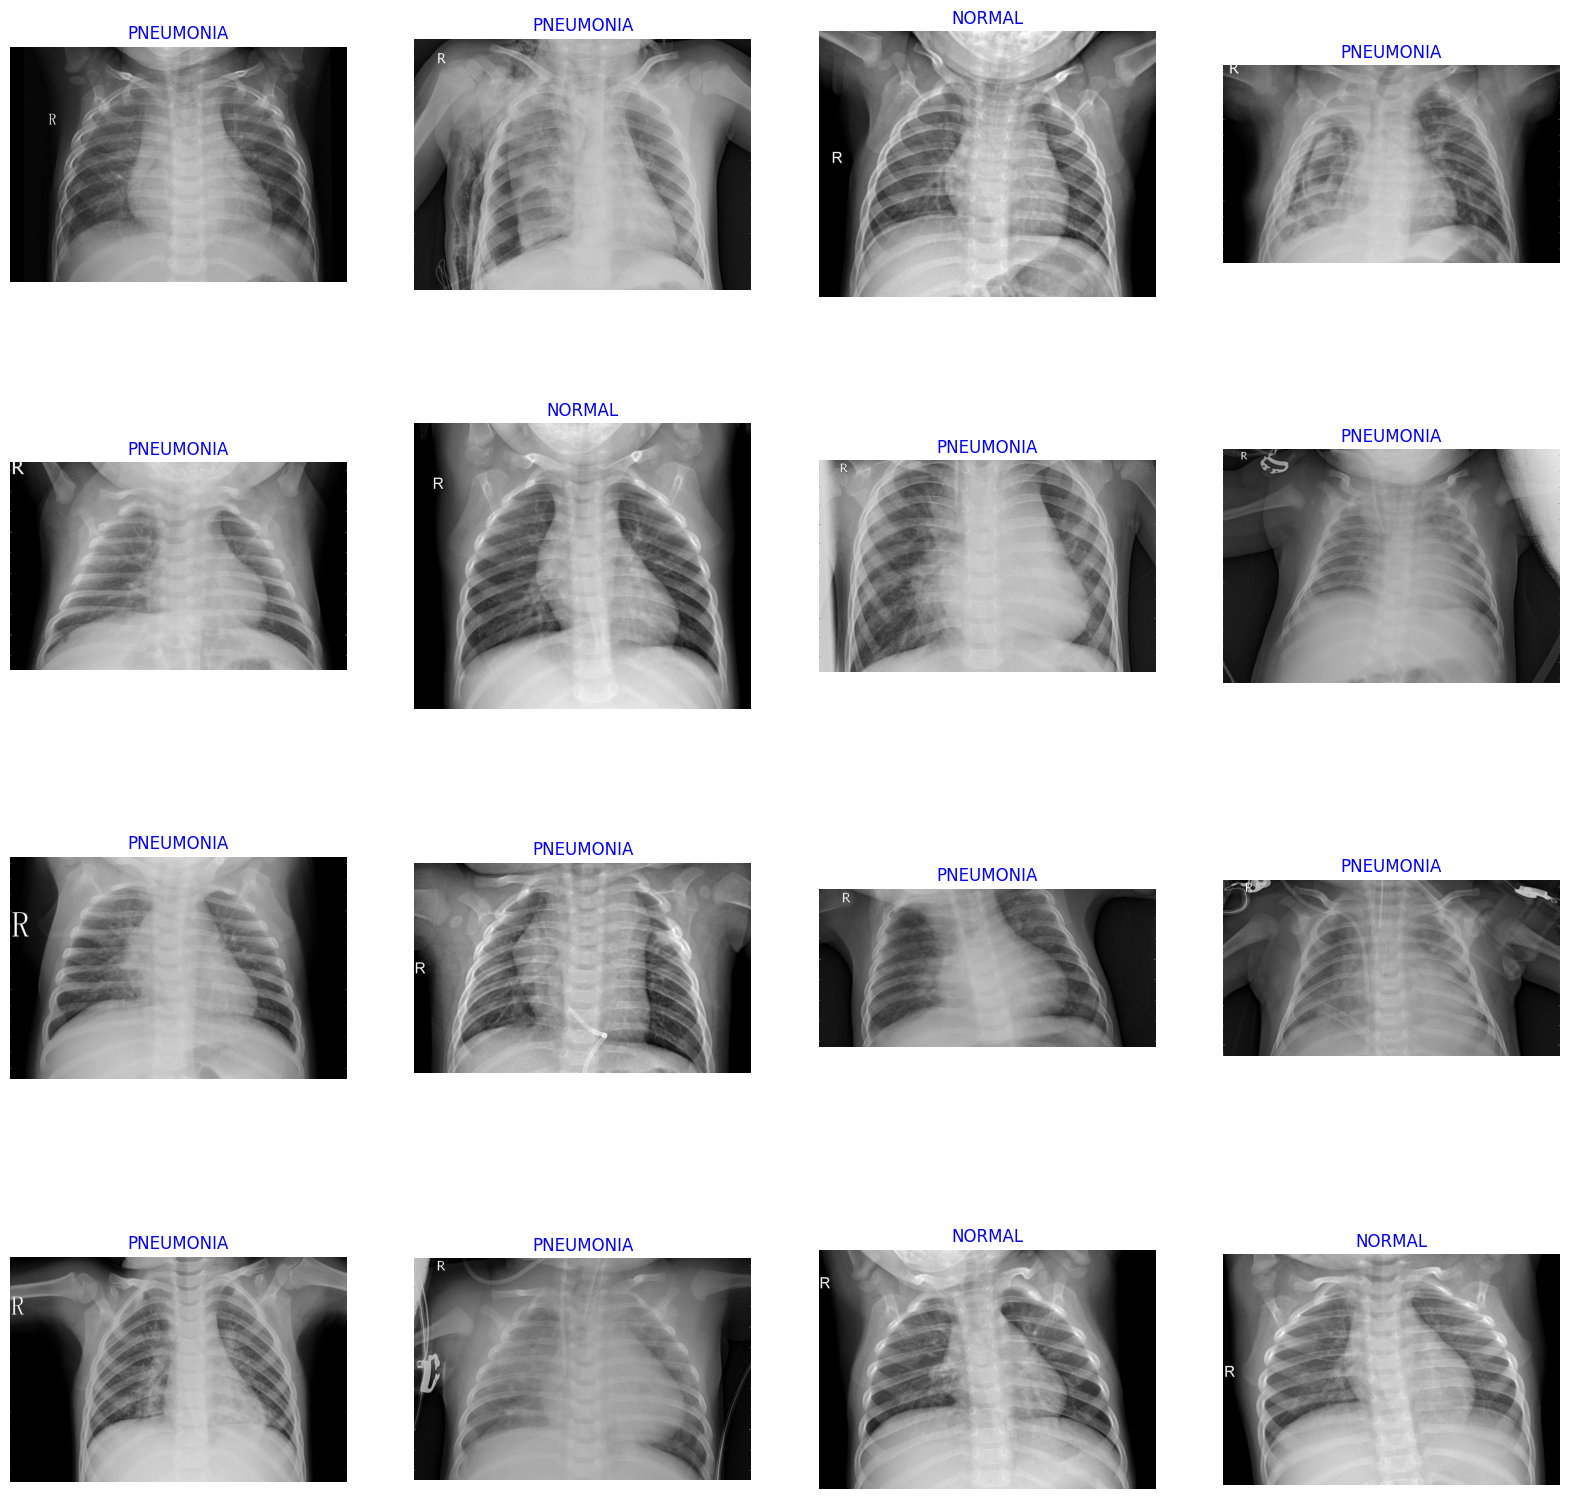

In [ ]:
import cv2
import random

# Helper function to display images from the DataFrame
def display_images_from_df(df, num_images=16):
    """
    Displays a grid of images from the DataFrame along with their class labels.

    Parameters:
        df (DataFrame): The dataset containing file paths and labels.
        num_images (int): Number of images to display.
    """
    # Randomly sample rows from the DataFrame
    sample_df = df.sample(n=num_images)

    # Set up the plot grid
    plt.figure(figsize=(20, 20))

    for i, (_, row) in enumerate(sample_df.iterrows()):
        # Load the image
        image = cv2.imread(row['filepaths'])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

        # Plot the image
        plt.subplot(4, 4, i + 1)
        plt.imshow(image)
        plt.title(row['labels'], color='blue', fontsize=12)
        plt.axis('off')

    plt.show()

# Load data into DataFrames
train_df = load_paths_labels(train_dir, 'train')
val_df = load_paths_labels(val_dir, 'val')
test_df = load_paths_labels(test_dir, 'test')

# Concatenate the DataFrames
df = pd.concat([train_df, val_df, test_df], ignore_index=True)


# Example usage: Display 16 random images
display_images_from_df(df, num_images=16)


In [ ]:
# Count the number of samples in each class and set
print("\nClass Distribution:")
class_counts = df['labels'].value_counts()
print(class_counts)

print("\nDistribution across sets (train/val/test):")
set_counts = df['set'].value_counts()
print(set_counts)



Class Distribution:
labels
PNEUMONIA    4273
NORMAL       1583
Name: count, dtype: int64

Distribution across sets (train/val/test):
set
train    4740
test      624
val       492
Name: count, dtype: int64


<ipython-input-7-08fa9a91e8e2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='labels', order=class_counts.index, palette='viridis')


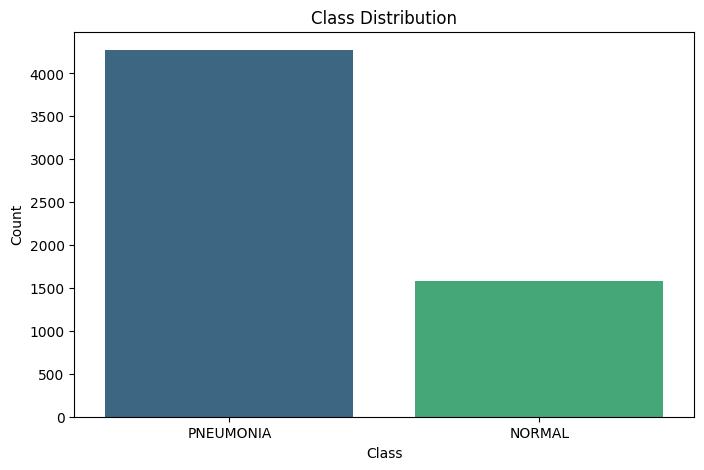

<ipython-input-7-08fa9a91e8e2>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='set', order=set_counts.index, palette='viridis')


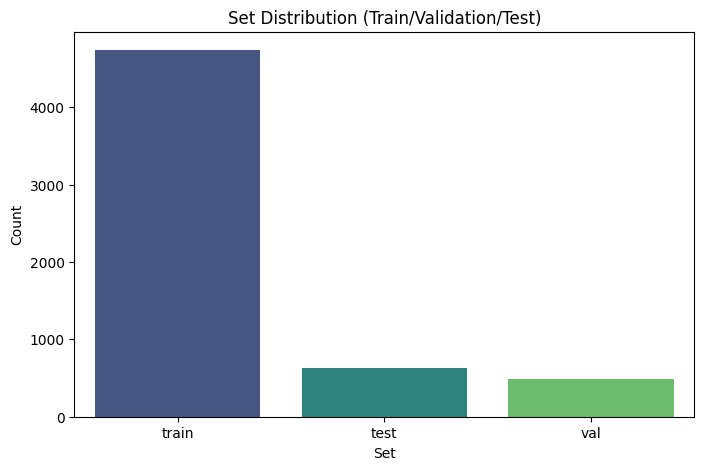

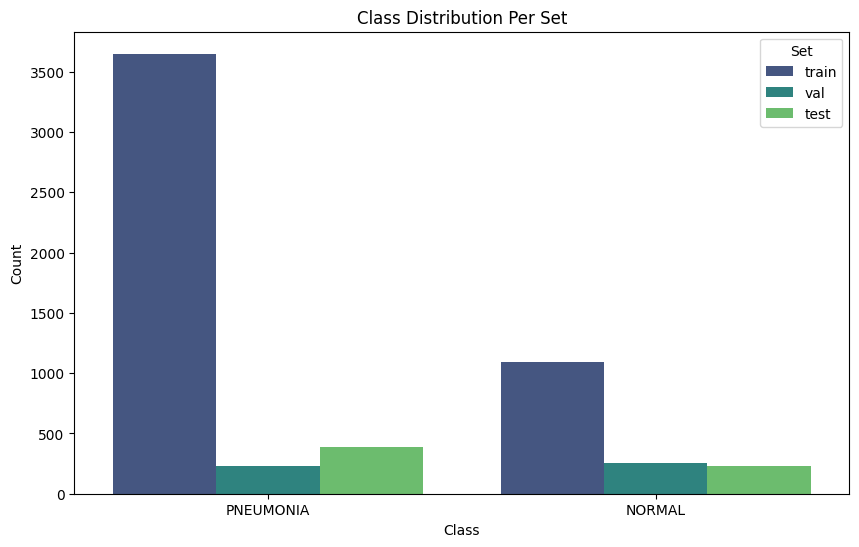

In [ ]:
# Visualize the class distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='labels', order=class_counts.index, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Visualize the distribution across sets
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='set', order=set_counts.index, palette='viridis')
plt.title('Set Distribution (Train/Validation/Test)')
plt.xlabel('Set')
plt.ylabel('Count')
plt.show()

# Combined class distribution per set
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='labels', hue='set', palette='viridis')
plt.title('Class Distribution Per Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Set')
plt.show()


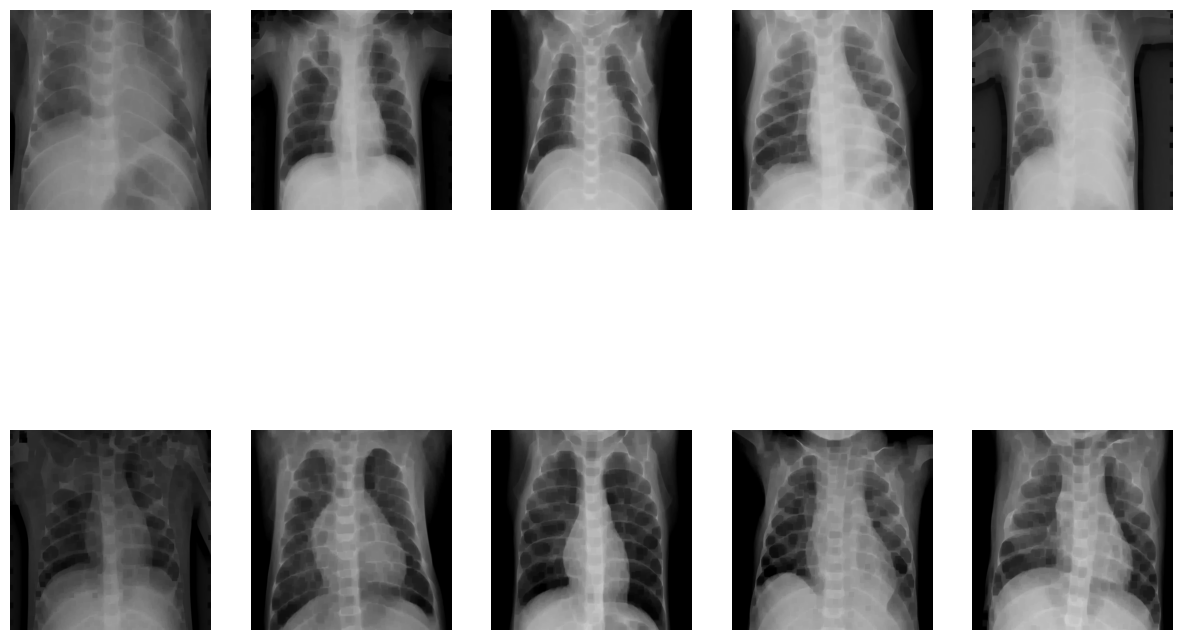

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_eroded_images(image_paths, grid_size=(2, 5), target_size=(512, 512), kernel_size=(5, 5), iterations=3):
    """
    Visualizes a grid of eroded images.

    Parameters:
        image_paths (list): List of image file paths to process and display.
        grid_size (tuple): Number of rows and columns in the grid (default: 2x5).
        target_size (tuple): Target size for resizing images (default: 512x512).
        kernel_size (tuple): Size of the kernel for erosion (default: 5x5).
        iterations (int): Number of iterations for erosion (default: 3).
    """
    fig = plt.figure(figsize=(15, 10))
    rows, cols = grid_size

    kernel = np.ones(kernel_size, np.uint8)  # Define the erosion kernel

    for i in range(1, rows * cols + 1):
        if i > len(image_paths):  # Prevent out-of-range errors
            break

        # Read and preprocess the image
        img = cv2.imread(image_paths[i - 1])
        img = cv2.resize(img, target_size)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Apply erosion
        img_erosion = cv2.erode(img, kernel, iterations=iterations)

        # Add to the grid
        fig.add_subplot(rows, cols, i)
        plt.imshow(img_erosion)
        plt.axis(False)

    plt.show()

visualize_eroded_images(df['filepaths'].tolist(), grid_size=(2, 5))


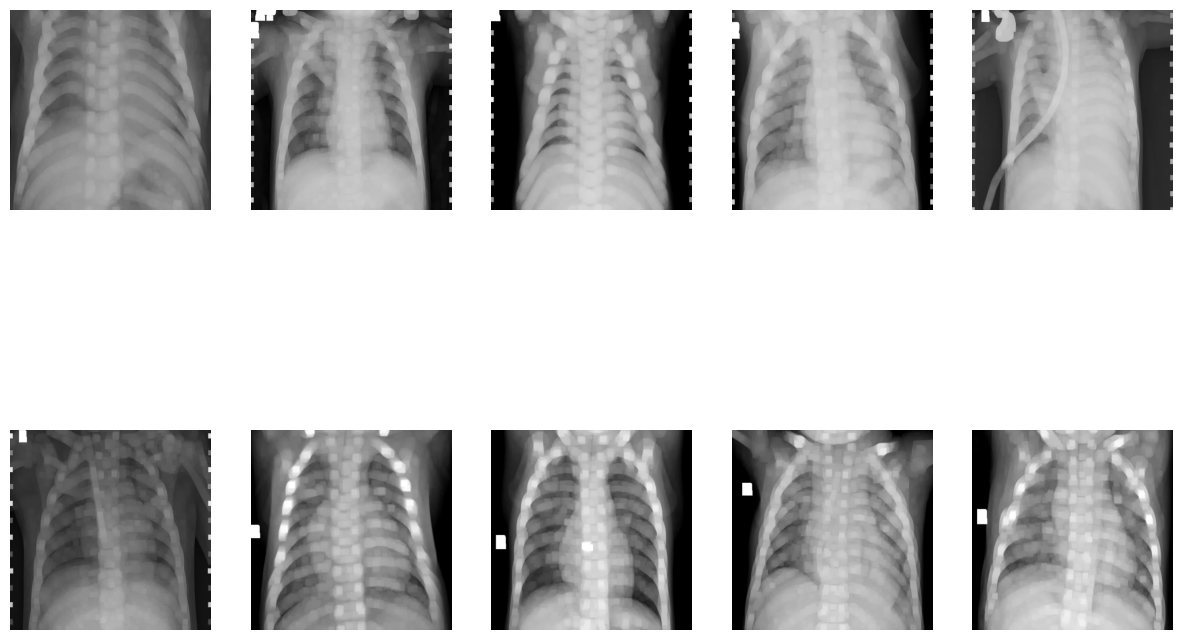

In [ ]:
def visualize_dilation(images, grid_size=(2, 5), target_size=(512, 512), kernel_size=(5, 5), iterations=3):
    """
    Visualizes the effect of dilation on a set of images in a grid.

    Parameters:
        images (list): List of image file paths.
        grid_size (tuple): Number of rows and columns in the grid.
        target_size (tuple): Resize dimensions for the image.
        kernel_size (tuple): Size of the dilation kernel.
        iterations (int): Number of dilation iterations.
    """
    fig = plt.figure(figsize=(15, 10))
    rows, cols = grid_size

    # Define the kernel
    kernel = np.ones(kernel_size, np.uint8)

    for i in range(1, rows * cols + 1):
        if i >= len(images):  # Avoid index out of range
            break

        # Load and preprocess the image
        img = cv2.imread(images[i - 1])
        img = cv2.resize(img, target_size)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Apply dilation
        img_dilated = cv2.dilate(img, kernel, iterations=iterations)

        # Add to the grid
        fig.add_subplot(rows, cols, i)
        plt.imshow(img_dilated)
        plt.axis("off")

    plt.show()

visualize_dilation(df['filepaths'].tolist(), grid_size=(2, 5))


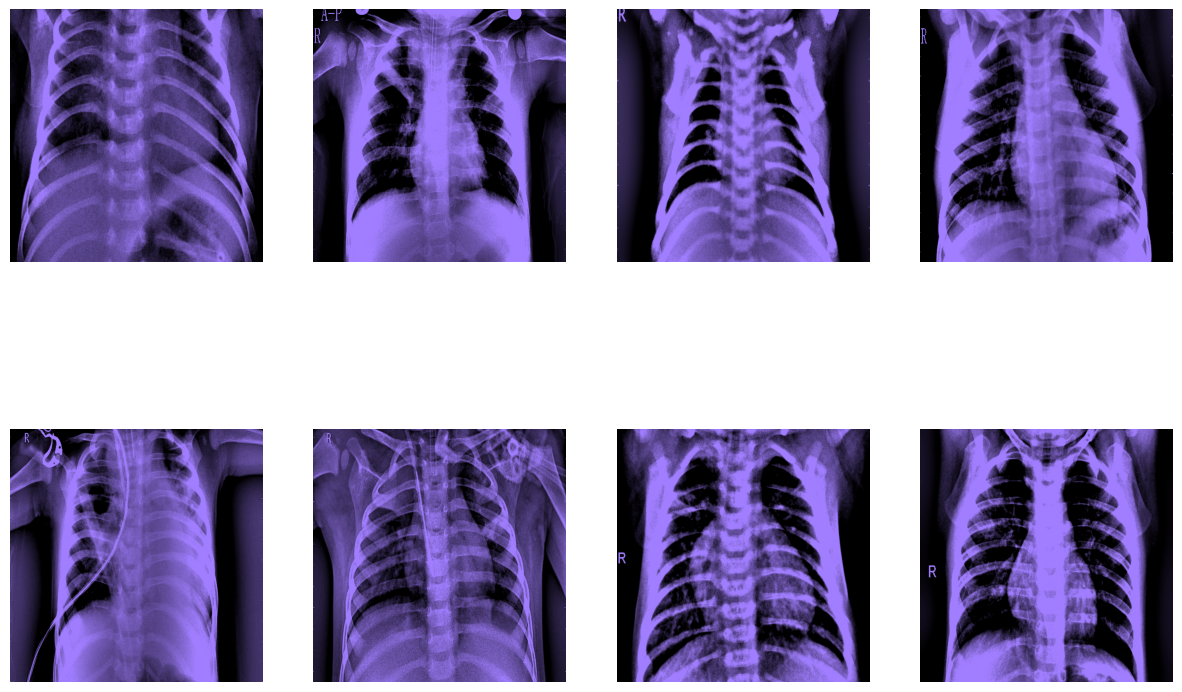

In [ ]:
# Visualization Function
def visualize_with_tint(images, grid_size=(2, 4), target_size=(512, 512), weight=4, blur_scale=10, bias=128):
    """
    Visualizes images with HSV adjustments and yellow-blue tint.

    Parameters:
        images (list): List of image file paths.
        grid_size (tuple): Number of rows and columns in the grid.
        target_size (tuple): Resize dimensions for the image.
        weight (float): Weight for original vs. blurred image.
        blur_scale (int): Scale for Gaussian blur.
        bias (int): Bias for brightness adjustment.
    """
    fig = plt.figure(figsize=(15, 10))
    rows, cols = grid_size

    for i in range(1, rows * cols + 1):
        if i >= len(images):  # Avoid index out of range
            break

        # Load and resize the image
        img = cv2.imread(images[i - 1])
        img = cv2.resize(img, target_size)

        # Convert to HSV
        img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

        # Apply weighted blending and Gaussian blur
        img_hsv = cv2.addWeighted(
            img_hsv, weight,
            cv2.GaussianBlur(img_hsv, (0, 0), target_size[0] / blur_scale), -weight, bias
        )

        # Convert back to RGB for proper visualization
        img_rgb = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)

        # Add to grid
        fig.add_subplot(rows, cols, i)
        plt.imshow(img_rgb)
        plt.axis("off")

    plt.show()
visualize_with_tint(df['filepaths'].tolist(), grid_size=(2, 4))

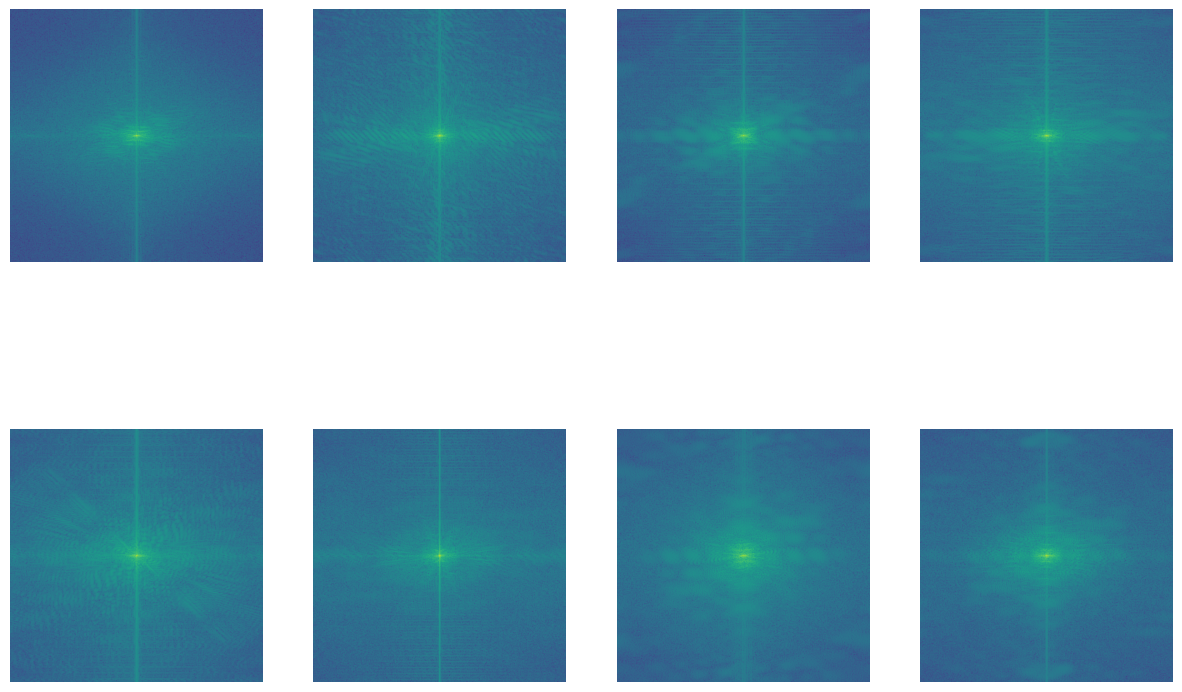

In [ ]:
def visualize_fft_magnitude(images, grid_size=(2, 4), target_size=(512, 512)):
    """
    Visualizes the FFT magnitude spectrum of a set of images in a grid.

    Parameters:
        images (list): List of image file paths.
        grid_size (tuple): Number of rows and columns in the grid.
        target_size (tuple): Resize dimensions for the image.
    """
    fig = plt.figure(figsize=(15, 10))
    rows, cols = grid_size

    for i in range(1, rows * cols + 1):
        if i >= len(images):  # Avoid index out of range
            break

        # Load and preprocess the image
        img = cv2.imread(images[i - 1])
        img = cv2.resize(img, target_size)
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Apply Fourier Transform
        f = np.fft.fft2(img_gray)
        fshift = np.fft.fftshift(f)
        magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)  # Avoid log(0) with +1

        # Add to the grid
        fig.add_subplot(rows, cols, i)
        plt.imshow(magnitude_spectrum, cmap='viridis')  # Use a colormap for better visualization
        plt.axis("off")

    plt.show()

visualize_fft_magnitude(df['filepaths'].tolist(), grid_size=(2, 4))


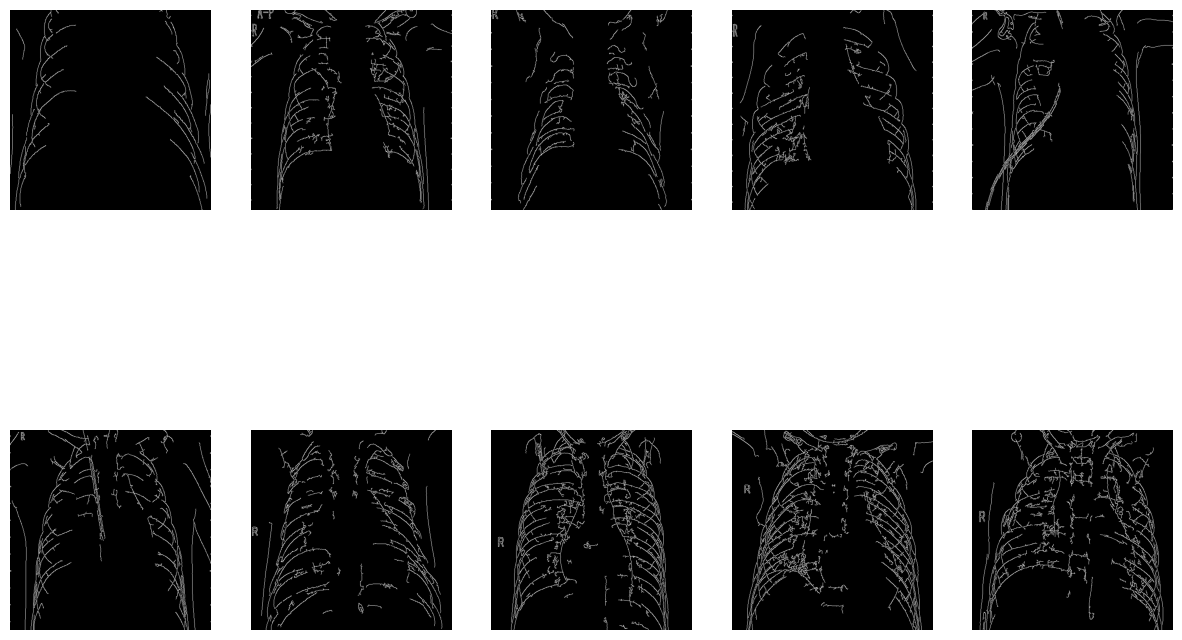

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def visualize_edges(images, grid_size=(2, 5), target_size=(512, 512), low_threshold=80, high_threshold=100):
    """
    Visualizes edges detected using Canny edge detection in a grid.

    Parameters:
        images (list): List of image file paths.
        grid_size (tuple): Number of rows and columns in the grid.
        target_size (tuple): Resize dimensions for the image.
        low_threshold (int): Lower threshold for the Canny edge detection.
        high_threshold (int): Upper threshold for the Canny edge detection.
    """
    fig = plt.figure(figsize=(15, 10))
    rows, cols = grid_size

    for i in range(1, rows * cols + 1):
        if i >= len(images):  # Prevent index out of range
            break

        # Load and preprocess the image
        img = cv2.imread(images[i - 1])
        img = cv2.resize(img, target_size)
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Apply Canny edge detection
        edges = cv2.Canny(img_gray, low_threshold, high_threshold)

        # Add to the grid
        fig.add_subplot(rows, cols, i)
        plt.imshow(edges, cmap='gray')  # Use grayscale colormap for better visualization
        plt.axis("off")

    plt.show()

visualize_edges(df['filepaths'].tolist(), grid_size=(2, 5), low_threshold=50, high_threshold=150)


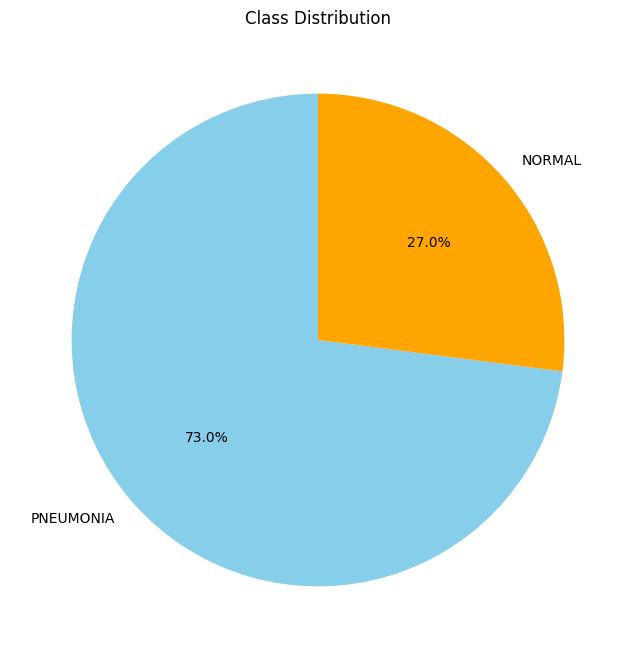

In [ ]:
# Pie chart for class distribution
plt.figure(figsize=(8, 8))
class_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title("Class Distribution")
plt.ylabel("")  # Remove y-label
plt.show()

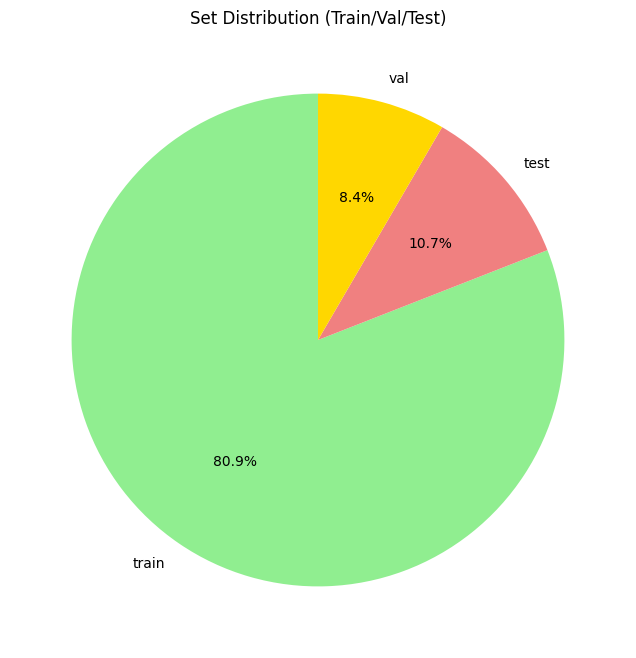

In [ ]:
# Pie chart for set distribution
plt.figure(figsize=(8, 8))
set_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral', 'gold'])
plt.title("Set Distribution (Train/Val/Test)")
plt.ylabel("")  # Remove y-label
plt.show()

In [ ]:
# Analyze image dimensions
image_sizes = []

for filepath in df['filepaths']:
    image = cv2.imread(filepath)
    if image is not None:
        image_sizes.append(image.shape[:2])  # (height, width)

# Convert to DataFrame for analysis
size_df = pd.DataFrame(image_sizes, columns=['Height', 'Width'])

# Display basic statistics
print("Image Size Statistics:")
print(size_df.describe())

# Plot distributions of image dimensions
plt.figure(figsize=(8, 5))
size_df['Height'].plot(kind='hist', bins=30, alpha=0.7, label='Height', color='blue')
size_df['Width'].plot(kind='hist', bins=30, alpha=0.7, label='Width', color='orange')
plt.title("Image Dimension Distribution")
plt.xlabel("Pixels")
plt.ylabel("Frequency")
plt.legend()
plt.grid(axis='y')
plt.show()


KeyboardInterrupt: 

In [ ]:
# Add image sizes to the main DataFrame
df['Height'] = [size[0] for size in image_sizes]
df['Width'] = [size[1] for size in image_sizes]

# Average image sizes by class
avg_sizes_by_class = df.groupby('labels')[['Height', 'Width']].mean()
print("Average Image Sizes by Class:")
print(avg_sizes_by_class)

# Bar chart for average image sizes by class
avg_sizes_by_class.plot(kind='bar', figsize=(8, 5), alpha=0.8)
plt.title("Average Image Dimensions by Class")
plt.ylabel("Pixels")
plt.xlabel("Class")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()
